In [26]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as mp
import os

In [27]:
files = os.listdir("Downloads/Covid-19")
files

['worldometer_data.csv',
 'full_grouped.csv',
 'day_wise.csv',
 'covid_19_clean_complete.csv',
 'usa_country_wise.csv',
 'country_wise_latest.csv']

In [28]:
def read_data(path,file_name):
    return pd.read_csv(path + "/" + file_name)

In [29]:
path = "Downloads/Covid-19"


In [30]:
day_wise = read_data(path,files[2])

In [31]:
group_data = read_data(path,files[3])

In [32]:
usa_data = read_data(path,files[4])

In [33]:
province_data = read_data(path,files[1])

In [34]:
world_data = read_data(path,files[0])

In [35]:
### Now I finished data preproccessig and I wanna know which country has the maximum total cases, Deaths, Recovered and active cases

In [38]:
world_data.head()

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
3,Russia,Europe,1.459409e+08,871894,NaN,14606.0,NaN,676357.0,NaN,180931.0,2300.0,5974.0,100.0,29716907.0,203623.0,Europe
4,South Africa,Africa,5.938157e+07,538184,NaN,9604.0,NaN,387316.0,NaN,141264.0,539.0,9063.0,162.0,3149807.0,53044.0,Africa


In [47]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [48]:
import plotly.express as px

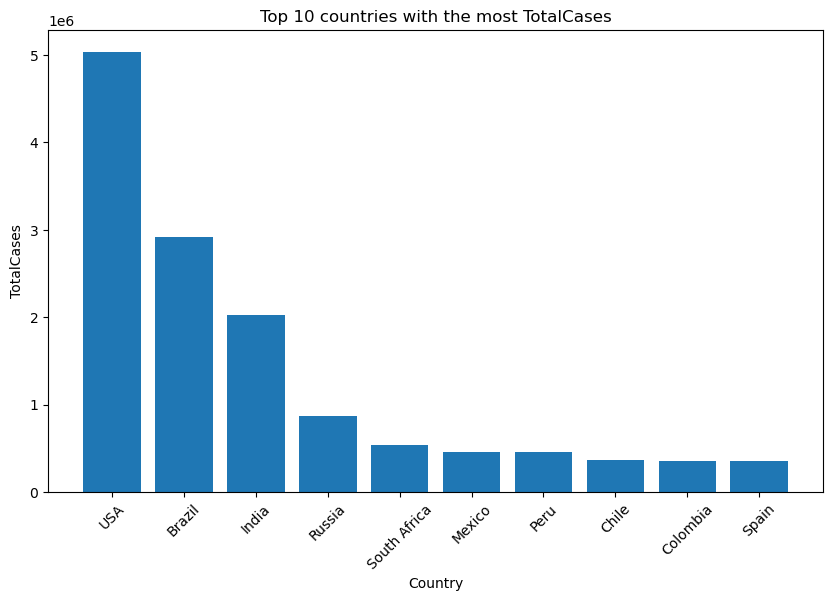

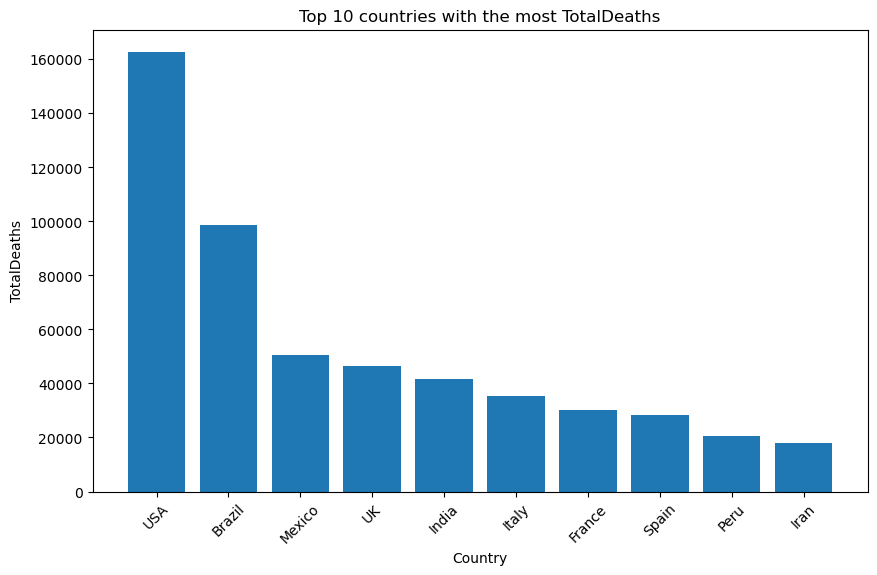

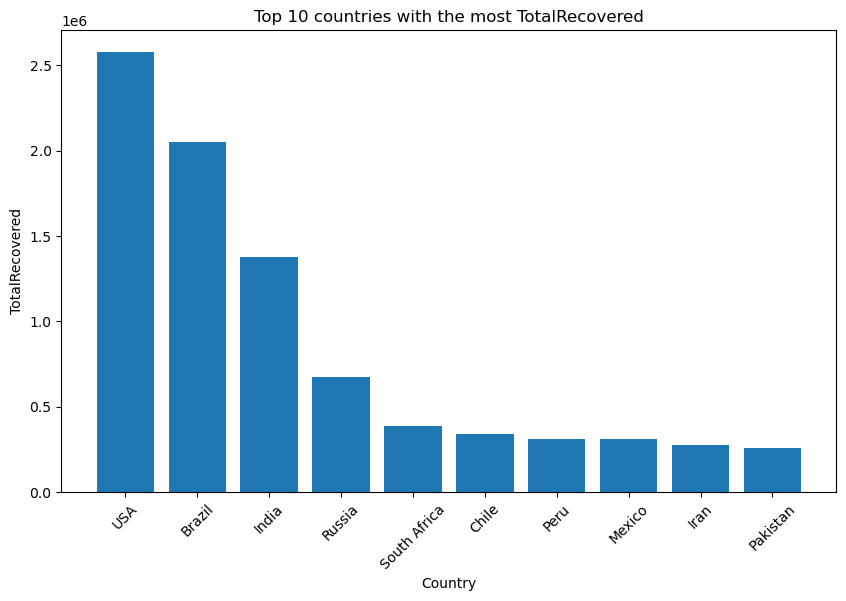

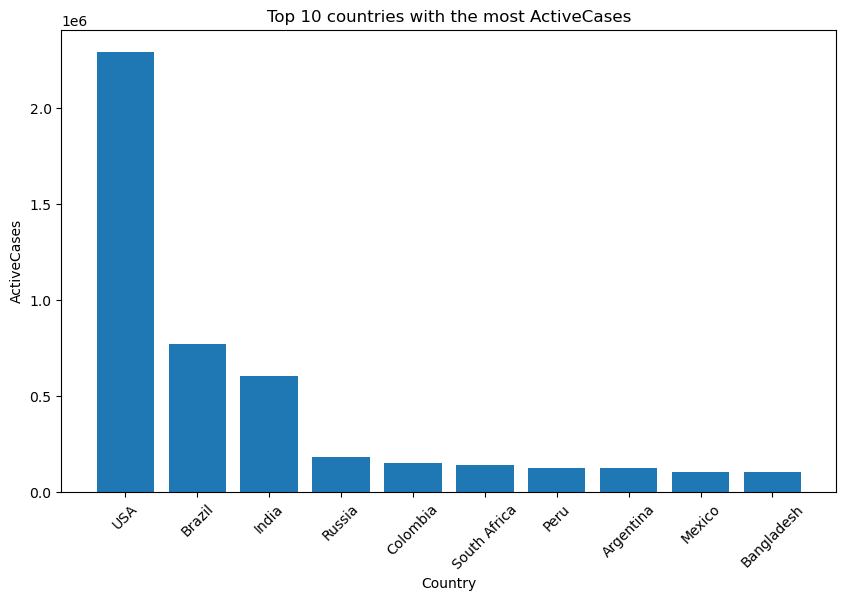

In [52]:
import matplotlib.pyplot as plt

columns = ["TotalCases", "TotalDeaths", "TotalRecovered", "ActiveCases"]

top_10_countries = {}

for col in columns:
    top_10_countries[col] = world_data.nlargest(10, col)

# Plotting bar charts
for col in columns:
    plt.figure(figsize=(10, 6))
    plt.bar(top_10_countries[col]['Country/Region'], top_10_countries[col][col])
    plt.xlabel("Country")
    plt.ylabel(col)
    plt.title(f"Top 10 countries with the most {col}")
    plt.xticks(rotation=45)
    plt.show()


In [53]:
### what is the trend of confirmed Deaths Recovered Active cases

In [54]:
day_wise.head(3)

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9


In [55]:
day_wise.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [57]:
px.line(day_wise, x = "Date", 
        y=['Confirmed', 'Deaths', 'Recovered', 'Active'], title="Covide cases with respect to Date",
       template="plotly_dark")

In [66]:
## Now I wanna visualize populattion to tests done ratio 

In [59]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [60]:
pop_test_ratio = world_data["Population"]/world_data["TotalTests"].iloc[0:20]

In [61]:
pop_test_ratio

0       5.245489
1      16.106896
2      62.365033
3       4.911040
4      18.852446
         ...    
204          NaN
205          NaN
206          NaN
207          NaN
208          NaN
Length: 209, dtype: float64

In [76]:
fig = px.bar(world_data.iloc[0:20], x= "Country/Region", y= pop_test_ratio[0:20], color= "Country/Region",
      title="pop to test done ratio ")
fig.show()

In [72]:
## I wanna found the top 20 countries which are badly affected by Corona

In [68]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [71]:
px.bar(world_data.iloc[0:20], 
       x="Country/Region", y=['Serious,Critical','TotalDeaths','TotalRecovered','ActiveCases','TotalCases'])

In [102]:
## Now I would like to find 20 most countries of total cases

In [84]:
fig = px.bar(world_data.iloc[0:20], x='TotalCases', y='Country/Region',color='TotalCases')
fig.update_layout(template="plotly_dark", title_text="Top 20 countries of total confirmed cases")
fig.show()


In [99]:
### Now I would like to showcase worse 20 countries having maximum number of Total Deaths 

In [87]:
world_data.sort_values(by='TotalDeaths', ascending=False)

,Country/Region,Continent,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,USA,North America,3.311981e+08,5032179,NaN,162804.0,NaN,2576668.0,NaN,2292707.0,18296.0,15194.0,492.0,63139605.0,190640.0,Americas
1,Brazil,South America,2.127107e+08,2917562,NaN,98644.0,NaN,2047660.0,NaN,771258.0,8318.0,13716.0,464.0,13206188.0,62085.0,Americas
5,Mexico,North America,1.290662e+08,462690,6590.0,50517.0,819.0,308848.0,4140.0,103325.0,3987.0,3585.0,391.0,1056915.0,8189.0,Americas
11,UK,Europe,6.792203e+07,308134,NaN,46413.0,NaN,NaN,NaN,NaN,73.0,4537.0,683.0,17515234.0,257873.0,Europe
2,India,Asia,1.381345e+09,2025409,NaN,41638.0,NaN,1377384.0,NaN,606387.0,8944.0,1466.0,30.0,22149351.0,16035.0,South-EastAsia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Saint Kitts and Nevis,North America,5.323700e+04,17,NaN,NaN,NaN,16.0,NaN,1.0,NaN,319.0,NaN,1146.0,21526.0,Americas
203,Greenland,North America,5.678000e+04,14,NaN,NaN,NaN,14.0,NaN,0.0,NaN,247.0,NaN,5977.0,105266.0,Europe
205,Caribbean Netherlands,North America,2.624700e+04,13,NaN,NaN,NaN,7.0,NaN,6.0,NaN,495.0,NaN,424.0,16154.0,NaN
206,Falkland Islands,South America,3.489000e+03,13,NaN,NaN,NaN,13.0,NaN,0.0,NaN,3726.0,NaN,1816.0,520493.0,NaN


In [89]:
fig = px.bar(world_data.sort_values(by='TotalDeaths', ascending=False)[0:20], 
             x='TotalDeaths', y='Country/Region',color='TotalDeaths')
fig.update_layout(template="plotly_dark", title_text="Top 20 countries of total confirmed cases")
fig.show()

In [100]:
### Now I would like to showcase worse 20 countries having maximum number of Active Cases

In [91]:
world_data.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [93]:
fig = px.bar(world_data.sort_values(by='TotalDeaths', ascending=False)[0:20], 
             x='ActiveCases', y='Country/Region',color='ActiveCases')
fig.update_layout(template="plotly_dark", title_text="Top 20 countries of total Active Cases")
fig.show()

In [101]:
### Now I would like to showcase worse 20 countries having maximum number of recovered Cases

In [97]:
fig = px.bar(world_data.sort_values(by='TotalRecovered', ascending=False)[0:20], 
             x='TotalRecovered', y='Country/Region',color='TotalDeaths')
fig.update_layout(template="plotly_dark", title_text="Top 20 countries of total recovered cases")
fig.show()

In [111]:
### Now i will figure out the max total number of TotalCases,TotalDeaths, TotalRecovered,
###ActiveCases respect to top 15 countries particularely. 

In [109]:
labels = world_data[0:15]["Country/Region"]
labels

0              USA
1           Brazil
2            India
3           Russia
4     South Africa
5           Mexico
6             Peru
7            Chile
8         Colombia
9            Spain
10            Iran
11              UK
12    Saudi Arabia
13        Pakistan
14      Bangladesh
Name: Country/Region, dtype: object

In [104]:
cases = ["TotalCases","TotalDeaths", "TotalRecovered", "ActiveCases"]

In [110]:
labels = world_data[0:15]["Country/Region"].values
for i in cases:
    fig= px.pie(world_data[0:15], values=i, 
           names=labels,hole=0.3,)
    fig.show()